In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('./train.tsv.gz', sep='\t')

## Simple Features 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [5]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [6]:
df.groupby('item_condition_id').agg({'price':'mean'})

,price
item_condition_id,
1,26.486967
2,27.563225
3,26.540711
4,24.349212
5,31.703859


In [7]:
df['category_name'].value_counts().head()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
Name: category_name, dtype: int64

In [8]:
df['cat_split'] = df['category_name'].apply(lambda x: str(x).split('/'))

In [9]:
df['cat_1'] = df['cat_split'].apply(lambda x : x[0] if len(x)> 0 else None)

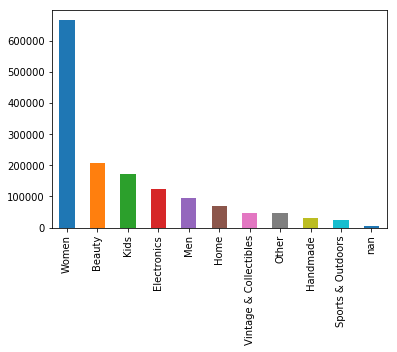

In [10]:
df['cat_1'].value_counts().plot(kind='bar')
plt.show()

In [11]:
df['cat_2'] = df['cat_split'].apply(lambda x : x[1] if len(x)> 1 else None)
df['cat_3'] = df['cat_split'].apply(lambda x : x[2] if len(x)> 2 else None)

In [12]:
df['cat_2'].value_counts().head()

Athletic Apparel    134383
Makeup              124624
Tops & Blouses      106960
Shoes               100452
Jewelry              61763
Name: cat_2, dtype: int64

## Strings to numbers 

In [13]:
df['cat_1_freq'] = df['cat_1'].map(df['cat_1'].value_counts())
df['cat_2_freq'] = df['cat_2'].map(df['cat_2'].value_counts())
df['cat_3_freq'] = df['cat_3'].map(df['cat_3'].value_counts())

In [14]:
df['len_description'] = df['item_description'].apply(lambda x : len(str(x)))

In [15]:
df['len_name'] = df['name'].apply(lambda x : len(str(x)))

In [16]:
df['brand_name_freq'] = df['brand_name'].map(df['brand_name'].value_counts())

In [17]:
df_numbers = df[df.columns[df.dtypes != object]]

In [18]:
df_numbers.fillna(0, inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [19]:
features = df_numbers.columns.tolist()
features.remove('price')
label = 'price'

In [20]:
X = df_numbers[features]
y = df_numbers[label]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
rfr = RandomForestRegressor(n_estimators=50, max_depth=6, verbose=100, n_jobs=-1)
rfr.fit(X_train, y_train)

building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 5 of 50building tree 4 of 50building tree 6 of 50building tree 7 of 50building tree 8 of 50




[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.2s
building tree 9 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.2s
building tree 10 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.3s
building tree 11 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.3s
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.3s
building tree 12 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.4s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.4s
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.4s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.4s
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.4

## Evaluate 

In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
rfr.set_params(verbose=0)

In [ ]:
predictions = rfr.predict(X_test)

In [ ]:
mean_squared_log_error(predictions, y_test)**0.5

In [ ]:
df_importance = pd.DataFrame()
df_importance['features'] = features

In [ ]:
rfr.feature_importances_